<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Carga desde un archivo .xlsx sin indice
Barcelona= pd.read_csv("Barcelona(Cataluña).csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  18927 non-null  object 
 1   source                                        18927 non-null  object 
 2   name                                          18927 non-null  object 
 3   description                                   18189 non-null  object 
 4   neighborhood_overview                         9154 non-null   object 
 5   host_id                                       18927 non-null  int64  
 6   host_name                                     18924 non-null  object 
 7   host_since                                    18924 non-null  object 
 8   host_location                                 14551 non-null  object 
 9   host_about                                    12152 non-null 

**Determinación de Clases para datos agrupados**


In [4]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [5]:
#Corroboramos valores nulos
valores_nulos=Barcelona.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       738
neighborhood_overview                            9773
host_id                                             0
host_name                                           3
host_since                                          3
host_location                                    4376
host_about                                       6775
host_response_time                               2890
host_response_rate                               2890
host_acceptance_rate                             2744
host_is_superhost                                 567
host_neighbourhood                               9776
host_listings_count                                 3
host_total_listings_count                           3
host_verifications                                  3
host_has_profile_pic        

In [6]:
#Calculamos el numero total de la población "n"
Barcelona['maximum_nights_avg_ntm']. info()
n=26401

<class 'pandas.core.series.Series'>
RangeIndex: 18927 entries, 0 to 18926
Series name: maximum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
18927 non-null  float64
dtypes: float64(1)
memory usage: 148.0 KB


In [7]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Barcelona['maximum_nights_avg_ntm'].max()
Min=Barcelona['maximum_nights_avg_ntm'].min()
Limites= [Min, Max]
Limites

[1.0, 2147483647.0]

In [8]:
#Calculamos el rango R
R=Max-Min
R

2147483646.0

In [9]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [10]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

136958789.83393815

**Creación de Categorias a partir de clases**

In [11]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(0.99, 2147483647.1, 16)
intervalos

array([9.90000000e-01, 1.43165577e+08, 2.86331154e+08, 4.29496730e+08,
       5.72662307e+08, 7.15827883e+08, 8.58993459e+08, 1.00215904e+09,
       1.14532461e+09, 1.28849019e+09, 1.43165577e+09, 1.57482134e+09,
       1.71798692e+09, 1.86115249e+09, 2.00431807e+09, 2.14748365e+09])

In [12]:
#Creamos las categorías 
categorias= ["Categoría1 (9.9-1.8 maximum_nights_avg_ntm)", "Categoría2 (1.9-3.6 maximum_nights_avg_ntm)","Categoría3 (3.7-5.4 maximum_nights_avg_ntm)", "Categoría4 (5.5-7.1 maximum_nights_avg_ntm)",
             "Categoría5 (7.2-8.9 maximum_nights_avg_ntm)", "Categoría6 (9-1 maximum_nights_avg_ntm)","Categoría7 (1.1-1.2 maximum_nights_avg_ntm)", "Categoría8 (1.3-1.4 maximum_nights_avg_ntm)", "Categoría9 (1.5-1.6 maximum_nights_avg_ntm)", "Categoría10 (1.7-1.8 maximum_nights_avg_ntm)","Categoría11 (1.9-2 maximum_nights_avg_ntm)", "Categoría12 (2.1-2.3 maximum_nights_avg_ntm)",
             "Categoría13 (2.4-2.5 maximum_nights_avg_ntm)", "Categoría14 (2.6-2.7 maximum_nights_avg_ntm)","Categoría15 (2.7-2.8 maximum_nights_avg_ntm)"
             ]

In [13]:
#Finalmente creamos las categorías en la columna numérica
Barcelona['maximum_nights_avg_ntm']=pd.cut(x= Barcelona['maximum_nights_avg_ntm'], bins=intervalos, labels= categorias)
Barcelona['maximum_nights_avg_ntm']

0         Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
1         Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
2         Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
3         Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
4         Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
5         Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
6         Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
7         Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
8         Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
9         Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
10        Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
11        Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
12        Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
13        Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
14        Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
15        Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
16        Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
17        Categoría1 (9.9-1.8 maximum_nights_avg_ntm)
18        Categoría1 (9.9-1.

In [14]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Barcelona['maximum_nights_avg_ntm'].value_counts().reset_index()
Tabla_freq

maximum_nights_avg_ntm  count
0    Categoría1 (9.9-1.8 maximum_nights_avg_ntm)  18925
1   Categoría15 (2.7-2.8 maximum_nights_avg_ntm)      2
2    Categoría2 (1.9-3.6 maximum_nights_avg_ntm)      0
3    Categoría3 (3.7-5.4 maximum_nights_avg_ntm)      0
4    Categoría4 (5.5-7.1 maximum_nights_avg_ntm)      0
5    Categoría5 (7.2-8.9 maximum_nights_avg_ntm)      0
6        Categoría6 (9-1 maximum_nights_avg_ntm)      0
7    Categoría7 (1.1-1.2 maximum_nights_avg_ntm)      0
8    Categoría8 (1.3-1.4 maximum_nights_avg_ntm)      0
9    Categoría9 (1.5-1.6 maximum_nights_avg_ntm)      0
10  Categoría10 (1.7-1.8 maximum_nights_avg_ntm)      0
11    Categoría11 (1.9-2 maximum_nights_avg_ntm)      0
12  Categoría12 (2.1-2.3 maximum_nights_avg_ntm)      0
13  Categoría13 (2.4-2.5 maximum_nights_avg_ntm)      0
14  Categoría14 (2.6-2.7 maximum_nights_avg_ntm)      0

In [15]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

maximum_nights_avg_ntm  count
0   Categoría1 (9.9-1.8 maximum_nights_avg_ntm)  18925
1  Categoría15 (2.7-2.8 maximum_nights_avg_ntm)      2

In [16]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('maximum_nights_avg_ntm')
Filtro_index

count
maximum_nights_avg_ntm                             
Categoría1 (9.9-1.8 maximum_nights_avg_ntm)   18925
Categoría15 (2.7-2.8 maximum_nights_avg_ntm)      2

Text(0, 0.5, 'Frecuencia')

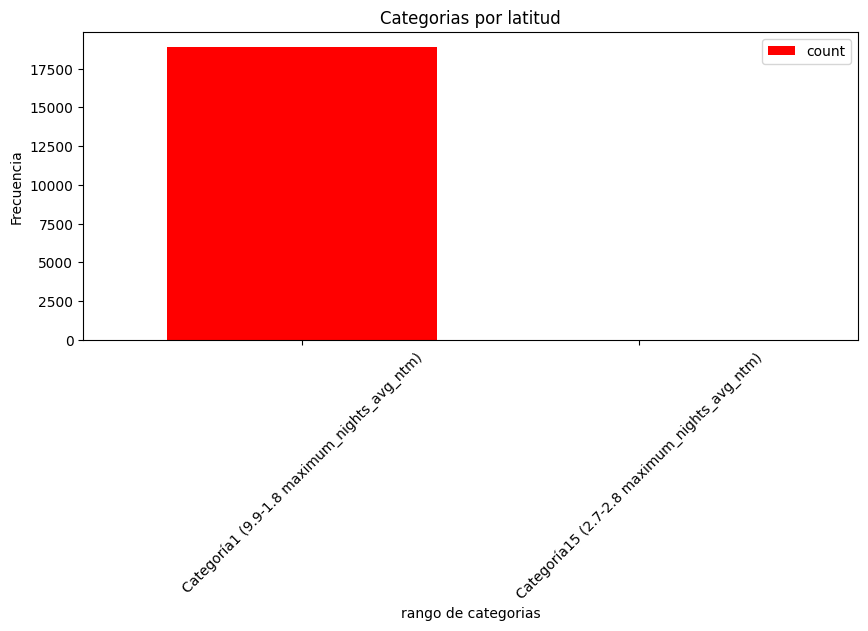

In [17]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')